In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings('ignore')

In [32]:
breast_cancer_load= load_breast_cancer()
breast_cancer = pd.DataFrame(breast_cancer_load.data, columns=breast_cancer_load.feature_names)
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
breast_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [34]:
breast_cancer.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [35]:
breast_cancer['class'] = pd.Series(breast_cancer_load.target)
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [36]:
features=['mean compactness','mean radius']

In [37]:
breast_cancer_class= ['class']

In [38]:
x = breast_cancer[features]

In [39]:
x= preprocessing.scale(x)

In [40]:
y = breast_cancer[breast_cancer_class]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = KNN.predict(x_test)
y_predall = KNN.predict(x)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  9]
 [10 78]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        55
           1       0.90      0.89      0.89        88

    accuracy                           0.87       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.87      0.87      0.87       143



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

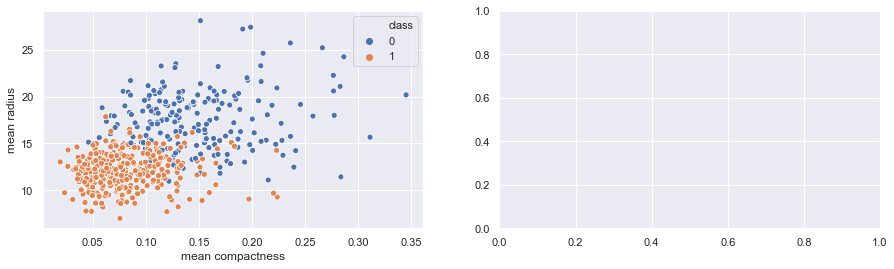

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = breast_cancer['mean compactness'], y = breast_cancer['mean radius'], hue = breast_cancer['class'], ax=axs[0])
sns.scatterplot(x = x_test['mean compactness'], y = x_test['mean radius'], hue = y_pred, ax=axs[1]);

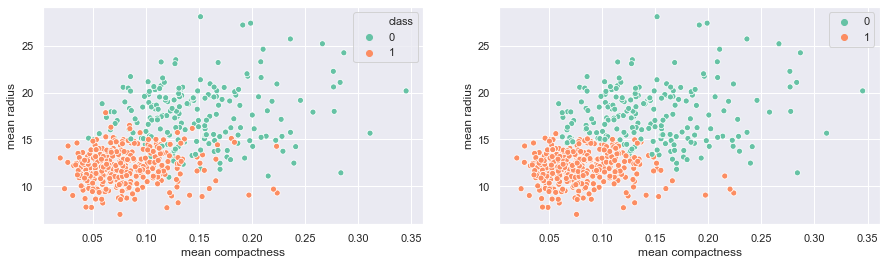

In [48]:
sns.set()
cmap = sns.cubehelix_palette(dark=.8, light=.3, as_cmap=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = breast_cancer['mean compactness'], y = breast_cancer['mean radius'], hue = breast_cancer['class'], palette="Set2", ax=axs[0])
sns.scatterplot(x = breast_cancer['mean compactness'], y = breast_cancer['mean radius'], hue = y_predall, palette="Set2", ax=axs[1]);

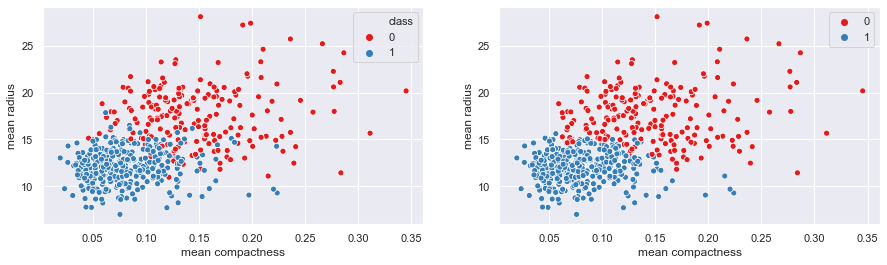

In [49]:
sns.set()
cmap = sns.cubehelix_palette(dark=.8, light=.3, as_cmap=True)


fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = breast_cancer['mean compactness'], y = breast_cancer['mean radius'], hue = breast_cancer['class'], palette="Set1", ax=axs[0])
sns.scatterplot(x = breast_cancer['mean compactness'], y = breast_cancer['mean radius'], hue = y_predall, palette="Set1", ax=axs[1]);

In [50]:
from sklearn.metrics import accuracy_score

acc = []
for i in range(1, 10):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    Kpredict = KNN.predict(x_test)
    accuracy = accuracy_score(y_test, Kpredict)
    acc.append(accuracy)
    
print(acc)   

[0.8531468531468531, 0.8391608391608392, 0.8671328671328671, 0.8601398601398601, 0.8671328671328671, 0.8601398601398601, 0.8881118881118881, 0.8811188811188811, 0.8811188811188811]


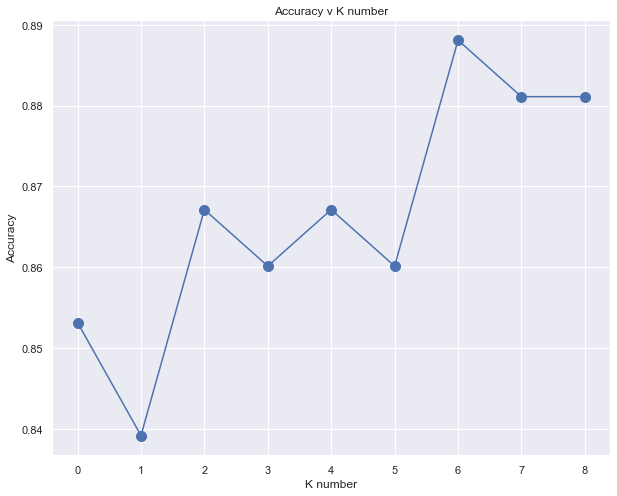

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(acc,  marker='o', markersize=10)
plt.title('Accuracy v K number')
plt.xlabel('K number')
plt.ylabel('Accuracy');